# Linear-Gaussian data experiments
This file contains the experiments and plotting code for the pure linear-Gaussian data. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CEVAE import *
from cevaetools import *
from lineartoydata import *
%load_ext autoreload
%autoreload 2

# Simple experiment with linear data and NN

### Loading the data generating parameters
- Folder linear_data_tests_appendix also contains the other four data generating processes in the Supplementary Material

In [5]:
main_folder = "linear_data_tests"

In [6]:
#c_x, c_t, c_yz, c_yt, s_x, s_t, s_y = generate_linear_parameters(2)
sub_folder_params = "params1"
#save_dataparameters([c_x, c_t, c_yz, c_yt, s_x, s_t, s_y], main_folder, sub_folder_params)

In [11]:
sub_folder_params = "params1"
[c_x, c_t, c_yz, c_yt, s_x, s_t, s_y] = load_dataparameters(main_folder, sub_folder_params)
[c_x, c_t, c_yz, c_yt, s_x, s_t, s_y]

[array([1.02738478, 1.46982946]),
 array([0.77905604]),
 array([0.71252344]),
 array([-0.6175966]),
 array([0.64706669, 0.96390686]),
 array([1.25008313]),
 array([0.48454304])]

### Generating data

In [17]:
datasize = [500,1000,2000,5000,10000,15000,20000]
dataparameters = [[dsize]+[c_x, c_t, c_yz, c_yt, s_x, s_t, s_y] for dsize in datasize]
data_sub_folder = "params1data500to20000"
param_times = 10
dfs, datasets = create_dfs_datasets(linear_data_df, dataparameters, param_times=param_times, repeat=False, 
                    main_folder=main_folder, sub_folder=data_sub_folder, labels=datasize)

In [18]:
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])

# Running full NN parameterized CEVAE

In [19]:
BATCH_SIZE = 200
#The following is a very rough estimate of the AID to be displayed while running the model.
#Due to the bad accuracy here, it displays an overestimate.
track_function = lambda model: estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, 
                                                       c_x, n=50, lim=6, nsample=100)[0]
true_value = 0
device = 'cpu'

num_epochs=300
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode]

sub_folder_model = "params1data500to20000NNmodels"
labels = [str(dsize) for dsize in datasize]
data_labels = [str(dsize) for dsize in datasize]

In [20]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels)

# Running CEVAE with linear conditionals and 1D latent

In [21]:
BATCH_SIZE = 200
track_function = lambda model: model.decoder.y_nn[0].weight[0,1]
true_value = c_yt
device = 'cpu'

num_epochs=500
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
x_loss_scaling=1
common_stds = True

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data500to20000linearmodels"
labels = [str(dsize) for dsize in datasets.keys()]
data_labels = [str(dsize) for dsize in datasets.keys()]

In [22]:
# Run the model
models, losses = run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, 
                                               BATCH_SIZE, track_function, true_value, 
                                               device, train_arguments, labels, data_labels,overwrite=True)

### Load the results

In [23]:
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data500to20000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

z_dim=1
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
sub_folder_model = "params1data500to20000linearmodels"
models_linear, losses_linear = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [24]:
AID_NN = np.zeros((param_times, len(labels)))
AID_linear = np.zeros((param_times, len(labels)))

gothrough = [(AID_NN, models_NN),(AID_linear, models_linear)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID_lineardata(models_[label][j], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

In [25]:
AID_analytical = np.zeros((param_times,len(labels)))
for i in range(len(labels)):
    for j in range(param_times):
        cov = cov_from_df(dfs[labels[i]][j])
        est_c_yt = analytical_cyt_estimate(cov)
        est_c_yz = np.sqrt(analytical_cyzsquared_estimate(cov))
        est_s_y = analytical_sy_estimate(cov)
        AID = analytical_method_AID(est_c_yz, est_c_yt, est_s_y, c_yt, c_yz, s_y, c_t, s_t)[0]
        AID_analytical[j,i] = AID

### Plot AID values

In [26]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times"
})

In [27]:
labels = ['500', '1000', '2000', '5000', '10000', '15000', '20000']
import seaborn as sns

plt.figure(figsize=(5.5,4))
palette = sns.color_palette("pastel")
places = list(range(len(labels)))
width = 0.15
diff = 0.21
for i in range(len(labels)):
    bplot1 = plt.boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[places[i]-diff*1], widths=[width],patch_artist=True)
    bplot2 = plt.boxplot(AID_linear[~np.isnan(AID_linear[:,i])][:,i], positions=[places[i]-diff*0], widths=[width],patch_artist=True)
    bplot3 = plt.boxplot(AID_analytical[:,i], positions=[places[i]+diff*1],widths=[width],patch_artist=True)
    colors = [palette[num] for num in range(4)]
    for j,bplot in enumerate([bplot1,bplot2,bplot3]):
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])
plt.xticks(places, datasize, fontsize=14)
plt.yticks(fontsize=14)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in range(4)]
plt.legend(custom_lines, ["Full CEVAE", "Linear, 1D latent", "Analytical"], frameon=False,
          fontsize=14)
plt.xlabel("Sample size", fontsize=15)
plt.ylabel("AID", fontsize=15)
plt.title("Linear-Gaussian data", fontsize=18)

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

# Run linear, 2D CEVAE from a bad initialization
### Handcraft bad starting state

In [113]:
from torch.utils.data import DataLoader
train_loader = DataLoader(datasets['20000'][0], batch_size=1000)
starting_model = CEVAE(x_dim=2, z_dim=2, device='cpu', p_y_zt_nn_layers=0,
        p_y_zt_nn_width=1, p_t_z_nn_layers=0, p_t_z_nn_width=1,
        p_x_z_nn_layers=0, p_x_z_nn_width=1, 
        q_z_nn_layers=0, q_z_nn_width=1,
        t_mode=0,y_mode=0,x_mode=[0,0],ty_separate_enc=False, z_mode=0, common_stds=True)
#Initialize the decoder
with torch.no_grad():
    starting_model.decoder.y_nn[0].weight = nn.Parameter(torch.Tensor([[c_yz[0],0,c_yt[0]],[0,0,0]]))
    starting_model.decoder.y_nn[0].bias = nn.Parameter(torch.Tensor([0,0]))
    starting_model.decoder.y_log_std = nn.Parameter(torch.Tensor([np.log(s_y[0])]))
    starting_model.decoder.t_log_std = nn.Parameter(torch.Tensor([np.log(s_t[0])]))
    starting_model.decoder.x_log_std = nn.Parameter(torch.Tensor([np.log(s_x[0]),np.log(s_x[1])]))
    starting_model.decoder.x_nn[0].weight = nn.Parameter(torch.Tensor([[0,c_x[0]],[0,c_x[1]],
                                                                       [0,0],[0,0]]))
    starting_model.decoder.x_nn[0].bias = nn.Parameter(torch.Tensor([0,0,0,0]))
    starting_model.decoder.t_nn[0].weight = nn.Parameter(torch.Tensor([[-c_t[0],0],[0,0]]))
    starting_model.decoder.t_nn[0].bias = nn.Parameter(torch.Tensor([0,0]))

#Initialize the encoder based on the true posterior, inferred from the data
df = dfs['20000'][0]
df['t'] = -df['t']
sigma11 = df.cov().iloc[0,0]
sigma12 = df.cov().iloc[0,-2:]
sigma22 = df.cov().iloc[-2:,-2:]
zmu_wty = sigma12.dot(np.linalg.inv(sigma22))
sigma_zty = sigma11 - sigma12.dot(np.linalg.inv(sigma22)).dot(sigma12.T)

sigmazx = df.cov().iloc[0,1:3]
sigmax = df.cov().iloc[1:3,1:3]
zmu_wx = sigmazx.dot(np.linalg.inv(sigmax))
sigma_zx = sigma11 - sigmazx.dot(np.linalg.inv(sigmax)).dot(sigmazx.T)

with torch.no_grad():
    starting_model.encoder.q_z_nn[0].weight = nn.Parameter(torch.Tensor([[0,0,zmu_wty[0],zmu_wty[1]],
                                                                         [zmu_wx[0],zmu_wx[1],0,0]
                                                                        ,[0,0,0,0],[0,0,0,0]]))
    starting_model.encoder.q_z_nn[0].bias = nn.Parameter(torch.Tensor([0,0,0,0]))
    starting_model.encoder.z_log_std = nn.Parameter(torch.Tensor([np.log(sigma_zty),np.log(sigma_zx)]))

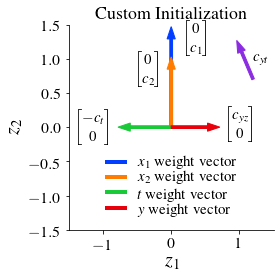

In [124]:
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times"
})

starting_model.decoder.x_nn[0].weight
xw = starting_model.decoder.x_nn[0].weight[:2,:].detach().numpy()
tw = starting_model.decoder.t_nn[0].weight[0,:].detach().numpy()
yw = starting_model.decoder.y_nn[0].weight[0,:].detach().numpy()

import seaborn as sns
palette = sns.color_palette("bright")#plt.get_cmap('Set3')
plt.figure(figsize=(4,4))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.gca().tick_params(axis='x', which='major',labelsize=16)
plt.gca().tick_params(axis='y', which='major',labelsize=16)
plt.gca().set_xlabel("$z_1$", fontsize=20)
plt.gca().set_ylabel("$z_2$", fontsize=20)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().arrow(0,0,xw[1,0],xw[1,1],length_includes_head=True,width=0.04,color=palette[0])
plt.gca().arrow(0,0,xw[0,0],xw[0,1],length_includes_head=True,width=0.04,color=palette[1])
plt.gca().arrow(0,0,tw[0],tw[1],length_includes_head=True,width=0.04,color=palette[2])
plt.gca().arrow(0,0,yw[0],yw[1],length_includes_head=True,width=0.04,color=palette[3])
plt.gca().arrow(1.2,0.7,-np.sin(0.4+np.pi)*yw[2],np.cos(0.4+np.pi)*yw[2],length_includes_head=True,width=0.04,
                color=palette[4])

for i,label in enumerate(["$x_1$ weight vector","$x_2$ weight vector",
                          "$t$ weight vector","$y$ weight vector"]):
    plt.plot([0],[0],label=label,color=palette[i], linewidth=4)
plt.legend(frameon=False, fontsize=15, bbox_to_anchor=(0.12,0.00), loc="lower left", handlelength=1.2,
            labelspacing=0)
plt.title("Custom Initialization", fontsize=18)
plt.tight_layout()

string = r'$\begin{bmatrix}' + r'{:.0f} \\ c_1'.format(0) + r'\end{bmatrix}$'
plt.text(xw[1,0]+.2,xw[1,1]-.4, string, fontsize=15)
string = r'$\begin{bmatrix}' + r'{:.0f} \\ c_2'.format(0) + r'\end{bmatrix}$'
plt.text(xw[0,0]-.5,xw[0,1]-.4, string, fontsize=15)
string = r'$\begin{bmatrix}' + r'-c_t \\ 0' + r'\end{bmatrix}$'
plt.text(tw[0]-.6,tw[1]-.2, string, fontsize=15)
string = r'$\begin{bmatrix}' + r'c_{yz} \\ 0' + r'\end{bmatrix}$'
plt.text(yw[0]+.1,yw[1]-.15, string, fontsize=15)
plt.text(1.2,0.95,r'$c_{yt}$', fontsize=15)

### Train the model with bad initialization

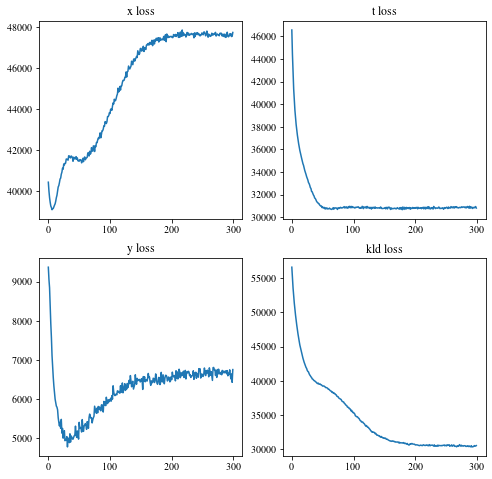

Total loss in the end:  115848.71728515625


In [118]:
model, losses, yweights = train_model_starting_from(device='cpu', plot_curves=False, print_logs=False, starting_model=starting_model,
              train_loader=train_loader, num_epochs=300, lr_start=0.001, lr_end=0.001, x_loss_scaling=1, collect_params=True)

In [623]:
torch.save(model.state_dict(), "data/linear_data_tests/wrongresults/model1")
with open("data/linear_data_tests/wrongresults/loss1", "wb") as f:
    pickle.dump(losses, f)
with open("data/linear_data_tests/wrongresults/yweights1", "wb") as f:
    pickle.dump(yweights, f)

### Train a comparison model with random initialization

Epoch 0:
Epoch loss: 242937.8486328125
x: 83127.5166015625, t: 42388.98474121094, y: 39163.37829589844, kld: 78257.966796875
Epoch 1:
Epoch loss: 190166.791015625
x: 77768.2861328125, t: 38502.667236328125, y: 34985.156982421875, kld: 38910.68054199219
Epoch 2:
Epoch loss: 163457.40087890625
x: 74085.8720703125, t: 36619.91516113281, y: 31218.726196289062, kld: 21532.888427734375
Epoch 3:
Epoch loss: 149390.66552734375
x: 72415.73095703125, t: 36128.16296386719, y: 28039.129150390625, kld: 12807.645446777344
Epoch 4:
Epoch loss: 141817.0615234375
x: 72013.42114257812, t: 36064.70910644531, y: 25800.446655273438, kld: 7938.483795166016
Epoch 5:
Epoch loss: 137522.759765625
x: 71916.12744140625, t: 36014.8427734375, y: 24414.987548828125, kld: 5176.801696777344
Epoch 6:
Epoch loss: 134951.4619140625
x: 71626.33862304688, t: 35900.79736328125, y: 23663.50537109375, kld: 3760.8206329345703
Epoch 7:
Epoch loss: 133190.16748046875
x: 70725.251953125, t: 35708.07019042969, y: 23106.5731201171

Epoch loss: 115802.11083984375
x: 47728.779296875, t: 32806.05334472656, y: 13854.474914550781, kld: 21412.803833007812
Epoch 64:
Epoch loss: 115841.08740234375
x: 47758.69287109375, t: 32793.10888671875, y: 13769.638671875, kld: 21519.647338867188
Epoch 65:
Epoch loss: 115812.40283203125
x: 47719.438232421875, t: 32804.58740234375, y: 13879.101867675781, kld: 21409.276489257812
Epoch 66:
Epoch loss: 115430.45458984375
x: 47473.25048828125, t: 32801.86804199219, y: 13677.466430664062, kld: 21477.868408203125
Epoch 67:
Epoch loss: 115532.8671875
x: 47648.860107421875, t: 32772.71691894531, y: 13735.403991699219, kld: 21375.88818359375
Epoch 68:
Epoch loss: 115560.45751953125
x: 47678.457763671875, t: 32765.171264648438, y: 13718.407836914062, kld: 21398.421508789062
Epoch 69:
Epoch loss: 115686.7001953125
x: 47648.71630859375, t: 32821.993896484375, y: 13823.905029296875, kld: 21392.087036132812
Epoch 70:
Epoch loss: 115684.11962890625
x: 47670.443603515625, t: 32774.93688964844, y: 137

Epoch loss: 115682.67236328125
x: 47578.188720703125, t: 32743.016235351562, y: 13626.552185058594, kld: 21734.913940429688
Epoch 127:
Epoch loss: 115600.10546875
x: 47633.790771484375, t: 32731.802612304688, y: 13710.344482421875, kld: 21524.168090820312
Epoch 128:
Epoch loss: 115802.60693359375
x: 47822.67626953125, t: 32719.938598632812, y: 13633.141845703125, kld: 21626.849853515625
Epoch 129:
Epoch loss: 115672.0751953125
x: 47504.372802734375, t: 32727.167236328125, y: 13726.697814941406, kld: 21713.836547851562
Epoch 130:
Epoch loss: 115639.6494140625
x: 47727.803955078125, t: 32738.067260742188, y: 13625.603698730469, kld: 21548.174926757812
Epoch 131:
Epoch loss: 115653.91796875
x: 47573.700927734375, t: 32701.347534179688, y: 13730.292297363281, kld: 21648.577392578125
Epoch 132:
Epoch loss: 115858.28125
x: 47620.313720703125, t: 32679.7236328125, y: 13792.117004394531, kld: 21766.126708984375
Epoch 133:
Epoch loss: 115692.2734375
x: 47550.629638671875, t: 32733.656372070312,

Epoch loss: 115643.71044921875
x: 47551.240234375, t: 32674.714965820312, y: 13599.371520996094, kld: 21818.38427734375
Epoch 190:
Epoch loss: 115738.8857421875
x: 47714.4609375, t: 32644.544067382812, y: 13589.016723632812, kld: 21790.8642578125
Epoch 191:
Epoch loss: 115474.37060546875
x: 47556.869384765625, t: 32680.770629882812, y: 13442.151794433594, kld: 21794.579345703125
Epoch 192:
Epoch loss: 115794.193359375
x: 47797.36767578125, t: 32685.38818359375, y: 13588.47802734375, kld: 21722.95947265625
Epoch 193:
Epoch loss: 115632.748046875
x: 47612.9658203125, t: 32676.119506835938, y: 13491.672119140625, kld: 21851.989379882812
Epoch 194:
Epoch loss: 115679.6162109375
x: 47774.024658203125, t: 32696.873168945312, y: 13525.627502441406, kld: 21683.091064453125
Epoch 195:
Epoch loss: 115524.2421875
x: 47444.36376953125, t: 32726.830200195312, y: 13619.770568847656, kld: 21733.278930664062
Epoch 196:
Epoch loss: 115737.78369140625
x: 47609.2568359375, t: 32721.65283203125, y: 13674.

Epoch loss: 115598.1513671875
x: 47652.537109375, t: 32670.610107421875, y: 13532.117492675781, kld: 21742.887329101562
Epoch 253:
Epoch loss: 115564.51318359375
x: 47517.416015625, t: 32746.70703125, y: 13486.427673339844, kld: 21813.961547851562
Epoch 254:
Epoch loss: 115645.7587890625
x: 47585.881591796875, t: 32648.572387695312, y: 13654.156066894531, kld: 21757.148559570312
Epoch 255:
Epoch loss: 115724.193359375
x: 47685.33837890625, t: 32726.683227539062, y: 13521.745056152344, kld: 21790.4267578125
Epoch 256:
Epoch loss: 115603.39599609375
x: 47552.828369140625, t: 32705.407958984375, y: 13544.427734375, kld: 21800.732055664062
Epoch 257:
Epoch loss: 115450.0224609375
x: 47508.3134765625, t: 32717.61962890625, y: 13513.530212402344, kld: 21710.55859375
Epoch 258:
Epoch loss: 115780.451171875
x: 47785.500732421875, t: 32688.524169921875, y: 13592.796997070312, kld: 21713.629516601562
Epoch 259:
Epoch loss: 115593.1220703125
x: 47557.98388671875, t: 32661.738891601562, y: 13575.5

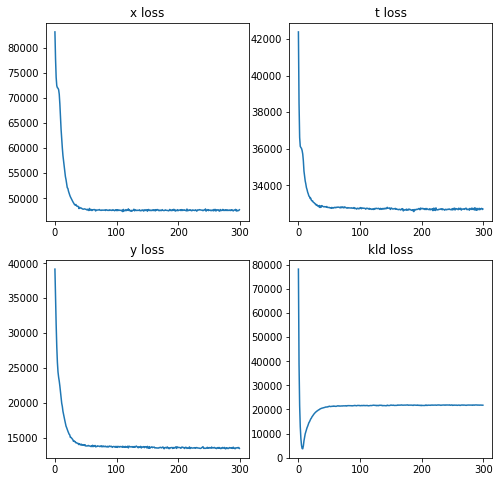

Total loss in the end:  115631.9951171875


In [16]:
from torch.utils.data import DataLoader
train_loader = DataLoader(datasets['20000'][0], batch_size=1000)
model_correct, loss_correct, yweights_correct = train_model(device='cpu', plot_curves=False, print_logs=True,
              train_loader=train_loader, num_epochs=300, lr_start=0.01, lr_end=0.0005, x_dim=2, z_dim=2,
              p_y_zt_nn_layers=0, p_y_zt_nn_width=10, 
              p_t_z_nn_layers=0, p_t_z_nn_width=10,
              p_x_z_nn_layers=0, p_x_z_nn_width=10,
              q_z_nn_layers=0, q_z_nn_width=10,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False,
                z_mode=0, x_loss_scaling=1, common_stds=True, collect_params=True)

In [23]:
torch.save(model_correct.state_dict(), "data/linear_data_tests/wrongresults/model_correct")
with open("data/linear_data_tests/wrongresults/loss_correct", "wb") as f:
    pickle.dump(loss_correct, f)
with open("data/linear_data_tests/wrongresults/yweights_correct", "wb") as f:
    pickle.dump(yweights_correct, f)

### Loading results

In [28]:
model_failed = CEVAE(x_dim=2, z_dim=2, device='cpu', p_y_zt_nn_layers=0,
        p_y_zt_nn_width=1, p_t_z_nn_layers=0, p_t_z_nn_width=1,
        p_x_z_nn_layers=0, p_x_z_nn_width=1, 
        q_z_nn_layers=0, q_z_nn_width=1,
        t_mode=0,y_mode=0,x_mode=[0,0],ty_separate_enc=False, z_mode=0, common_stds=True)
model_correct = CEVAE(x_dim=2, z_dim=2, device='cpu', p_y_zt_nn_layers=0,
        p_y_zt_nn_width=1, p_t_z_nn_layers=0, p_t_z_nn_width=1,
        p_x_z_nn_layers=0, p_x_z_nn_width=1, 
        q_z_nn_layers=0, q_z_nn_width=1,
        t_mode=0,y_mode=0,x_mode=[0,0],ty_separate_enc=False, z_mode=0, common_stds=True)
model_failed.load_state_dict(torch.load("data/linear_data_tests/wrongresults/model1"))
model_correct.load_state_dict(torch.load("data/linear_data_tests/wrongresults/model_correct"))
with open("data/linear_data_tests/wrongresults/loss1", "rb") as f:
    losses_failed = pickle.load(f)
with open("data/linear_data_tests/wrongresults/yweights1", "rb") as f:
    yweights_failed = pickle.load(f)
with open("data/linear_data_tests/wrongresults/loss_correct", "rb") as f:
    losses_correct = pickle.load(f)
with open("data/linear_data_tests/wrongresults/yweights_correct", "rb") as f:
    yweights_correct = pickle.load(f)

### Plotting the resulting state

In [29]:
xw = model_failed.decoder.x_nn[0].weight[:2,:].detach().numpy()
tw = model_failed.decoder.t_nn[0].weight[0,:].detach().numpy()
yw = model_failed.decoder.y_nn[0].weight[0,:].detach().numpy()
xc = model_correct.decoder.x_nn[0].weight[:2,:].detach().numpy()
tc = model_correct.decoder.t_nn[0].weight[0,:].detach().numpy()
yc = model_correct.decoder.y_nn[0].weight[0,:].detach().numpy()

In [30]:
palette = sns.color_palette("bright")
fig, ax = plt.subplots(1,2,figsize=(8,4))
for i in range(2):
    ax[i].set_xlim([-1.5, 1.5])
    ax[i].set_ylim([-1.5, 1.5])
    ax[i].tick_params(axis='x', which='major',labelsize=16)
    ax[i].tick_params(axis='y', which='major',labelsize=16)
    ax[i].set_xlabel("$z_1$", fontsize=20)
    ax[i].set_ylabel("$z_2$", fontsize=20)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
ax[0].arrow(0,0,xw[1,0],xw[1,1],length_includes_head=True,width=0.04,color=palette[0])
ax[0].arrow(0,0,xw[0,0],xw[0,1],length_includes_head=True,width=0.04,color=palette[1])
ax[0].arrow(0,0,tw[0],tw[1],length_includes_head=True,width=0.04,color=palette[2])
ax[0].arrow(0,0,yw[0],yw[1],length_includes_head=True,width=0.04,color=palette[3])

ax[1].arrow(0,0,xc[1,0],xc[1,1],length_includes_head=True,width=0.04,color=palette[0])
ax[1].arrow(0,0,xc[0,0],xc[0,1],length_includes_head=True,width=0.04,color=palette[1])
ax[1].arrow(0,0,tc[0],tc[1],length_includes_head=True,width=0.04,color=palette[2])
ax[1].arrow(0,0,yc[0],yc[1],length_includes_head=True,width=0.04,color=palette[3])

for i,label in enumerate(["$x_1$ weight vector","$x_2$ weight vector",
                          "$t$ weight vector","$y$ weight vector"]):
    ax[0].plot([0],[0],label=label,color=palette[i], linewidth=4)
ax[0].legend(frameon=False, fontsize=15, bbox_to_anchor=(0.12,0.05), loc="lower left", handlelength=1.2,
            labelspacing=0)
ax[0].set_title("Failed 2D estimation", fontsize=18)
ax[1].set_title("Correct 2D estimation", fontsize=18)
plt.tight_layout()

### Plotting convergence of loss function and c_yt estimates

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(range(10,300),losses_failed['total'][10:])
ax[0].plot(range(10,300),losses_correct['total'][10:])

ax[1].plot([yw[0,2] for yw in yweights_failed[:]])
ax[1].plot([yw[0,2] for yw in yweights_correct[:]])
ax[1].plot([0,300],[c_yt,c_yt], '--')

for i in range(2):
    ax[i].tick_params(axis='x', which='major',labelsize=16)
    ax[i].tick_params(axis='y', which='major',labelsize=16)
    ax[i].set_xlabel("Epoch", fontsize=18)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
ax[0].set_ylabel("Epoch loss", fontsize=18)
ax[1].set_ylabel("$c_{yt}$ estimate", fontsize=18)

ax[0].legend(["Customized initialization", "Random initialization"], frameon=False, fontsize=16)
ax[1].legend(["Customized initialization", "Random initialization", "Correct value"], frameon=False, fontsize=16)

# Proof that posterior collapse happens

In [32]:
meansquared_means = np.zeros((10,10))
std_means = np.zeros((10,10))
for i in range(10):
    print(i)
    meansquared_mean = np.zeros(10)
    std_mean = np.zeros(10)
    for data in datasets['20000'][i]:
        x,t,y = data['X'], data['t'], data['y']
        res = models_NN['20000'][i].encoder.q_z_nn(torch.cat([x,t,y]))
        mean, std = res[:10], torch.exp(res[10:])
        meansquared_mean += mean.detach().numpy()**2
        std_mean += std.detach().numpy()
    meansquared_mean = meansquared_mean / 20000
    std_mean = std_mean / 20000
    meansquared_means[i,:] = meansquared_mean
    std_means[i,:] = std_mean

In [33]:
fig, ax = plt.subplots(2,5,figsize=(14,6), sharex=True, sharey=True)
for i in range(10):
    x = i%5
    y = i//5
    ax[y,x].bar(range(1,11),meansquared_means[i,:])
    ax[y,x].set_title("Model {}".format(i+1), fontsize=16)
    ax[y,x].set_xticks(range(1,11))
    ax[y,x].set_xticklabels(range(1,11), fontsize=14)
    ax[y,x].set_yticklabels([0,0.2,0.4,0.6,0.8],fontsize=16)
for i in range(5):
    ax[1,i].set_xlabel("Latent dimension", fontsize=16)
ax[0,0].set_ylabel("$E[q_\phi(z|x,t,y)]^2$", fontsize=16)
ax[1,0].set_ylabel("$E[q_\phi(z|x,t,y)]^2$", fontsize=16)

# Test with 10D linear CEVAE and KL divergence annealing to prevent posterior collapse

### Load data

In [ ]:
data_sub_folder = "params1data500to20000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])
dataloader = DataLoader(datasets['2000'][1])

### Train the models

In [ ]:
model_list = []
losses_list = []
modelparams_list = []

for i in range(20):
    BATCH_SIZE = 1000
    true_value = 0
    device = 'cpu'

    num_epochs=500
    lr_start=0.0001
    lr_end=0.0001
    z_dim=10
    p_y_zt_nn_layers=0
    p_y_zt_nn_width=30
    p_t_z_nn_layers=0
    p_t_z_nn_width=30
    p_x_z_nn_layers=0
    p_x_z_nn_width=30
    q_z_nn_layers=0
    q_z_nn_width=30
    t_mode=0
    y_mode=0
    x_mode=np.array([0,0])
    x_dim = 2
    ty_separate_enc=False
    z_mode=0
    plot_curves = True
    print_logs = True
    
    # This defines the schedule that we anneal the KL divergence with.
    # The elements of the first list are proportions of the total training time
    # The elements of the second list are KL divergence scaling factors.
    # Between any two concecutive times specified by the first list, the KL
    # scaling factor changes linearly between the corresponding consecutive 
    # terms in the second list.
    kl_scaling_schedule = [[0,0.1,0.2,1],[0.5,0.5,1,1]]

    model, losses, modelparams = train_model(device, plot_curves, print_logs,
                  dataloader, num_epochs, lr_start, lr_end, x_dim, z_dim,
                  p_y_zt_nn_layers, p_y_zt_nn_width, 
                  p_t_z_nn_layers, p_t_z_nn_width,
                  p_x_z_nn_layers, p_x_z_nn_width,
                  q_z_nn_layers, q_z_nn_width,
                  t_mode, y_mode, x_mode, ty_separate_enc, 
                  z_mode, x_loss_scaling=1, common_stds=True, collect_params=True, 
                kl_scaling_schedule=kl_scaling_schedule)
    model_list.append(model)
    losses_list.append(losses)
    modelparams_list.append(modelparams)

### Save the results

In [ ]:
main_folder = "kldannealing"
sub_folder = "10dlinear_2runs_5"

modelparams_list
labels = list(range(len(model_list)))

create_or_empty_folder(main_folder,sub_folder)

for i in range(len(model_list)):
    torch.save(model_list[i].state_dict(), "./data/{}/{}/model_{}".format(main_folder,sub_folder,i))
    with open("./data/{}/{}/loss_{}".format(main_folder,sub_folder,i), "wb") as file:
        pickle.dump(losses_list[i], file)
    with open("./data/{}/{}/savedparams_{}".format(main_folder,sub_folder,i), "wb") as file:
        pickle.dump(modelparams_list[i], file)

### Load the results

In [ ]:
model_list = []
losses_list = [0]
modelparams_list = []

main_folder = "kldannealing"
sub_folder = "10dlinear_20runs"


device = 'cpu'
z_dim=10
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0

for i in range(20):
    if i != 0:
        with open("./data/{}/{}/loss_{}".format(main_folder,sub_folder,i), "rb") as file:
            losses_list.append(pickle.load(file))
    with open("./data/{}/{}/savedparams_{}".format(main_folder,sub_folder,i), "rb") as file:
        modelparams_list.append(pickle.load(file))
    
    model = CEVAE(x_dim, z_dim, device, p_y_zt_nn_layers, p_y_zt_nn_width, p_t_z_nn_layers,
                          p_t_z_nn_width, p_x_z_nn_layers, p_x_z_nn_width, q_z_nn_layers, q_z_nn_width,
                          t_mode, y_mode, x_mode, ty_separate_enc, z_mode, common_stds=True)
    model.load_state_dict(torch.load("./data/{}/{}/model_{}".format(main_folder,sub_folder,i)))
    model.eval()
    model_list.append(model)

### Plot c_yt estimates w.r.t. epochs trained

In [ ]:
plt.figure(figsize=(7,5))
plt.plot([0,500],[c_yt,c_yt], 'b--')

for i in range(len(modelparams_list)):
    plt.plot([param[0,-1] for param in modelparams_list[i]])
plt.plot([param[0,-1] for param in modelparams], linewidth=2, color='black', linestyle='-')
plt.ylabel("$c_{yt}$ estimate", fontsize=20)
plt.xlabel("Epoch", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.75,0.2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Linear CEVAE with KL annealing,\nlinear-Gaussian data", fontsize=20)
plt.show()

### Plot the coefficients of the decoder predictors, illustrating that there is no posterior collapse

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(6,5),sharex=True)
for j,modelnum in enumerate([9,4]):
    ax[0,j].bar(range(1,11),model_list[modelnum].decoder.x_nn[0].weight[0].detach()**2, color='C'+str(modelnum))
    ax[1,j].bar(range(1,11),model_list[modelnum].decoder.x_nn[0].weight[1].detach()**2, color='C'+str(modelnum))
    ax[2,j].bar(range(1,11),model_list[modelnum].decoder.t_nn[0].weight[0].detach()**2, color='C'+str(modelnum))
    ax[3,j].bar(range(1,11),model_list[modelnum].decoder.y_nn[0].weight[0][:-1].detach()**2, color='C'+str(modelnum))
    for i in range(4):
        ax[i,j].set_xticks(range(1,11))
        ax[i,j].set_xticklabels(labels=range(1,11),fontsize=15)
        ax[i,j].tick_params(axis='y', labelsize=15)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
    ax[0,j].set_title("$x_1$", fontsize=18)
    ax[1,j].set_title("$x_2$", fontsize=18)
    ax[2,j].set_title("$t$", fontsize=18)
    ax[3,j].set_title("$y$", fontsize=18)
    ax[3,j].set_xlabel("Latent dimension", fontsize=18)
plt.suptitle("Coefficients along the latent dimensions, squared", fontsize=20)
plt.tight_layout()
plt.show()

### KL anneling schedule visualized

In [ ]:
plt.figure(figsize=(2,1))
plt.plot([0,50,100,500],[0.5,0.5,1,1])
plt.ylim([0,1.1])
plt.title("KL scaling", fontsize=16)
plt.xlabel("Epoch", fontsize=16)
plt.xticks([0,250,500],fontsize=14)
plt.yticks([0,0.5,1],fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Loss functions visualized at the end of training

In [ ]:
plt.figure(figsize=(7,4))
for i in range(0,20):
    plt.plot(range(400,500),losses_list[i]['total'][400:])
h = plt.plot(range(400,500),losses['total'][400:], linewidth=4, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.title("Loss functions at the end of training", fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)